In [ ]:
#Use this to connect to google drive & Access live Sheets
from google.colab import auth
import gspread
from google.auth import default

#Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
sheet = gc.open('exp1').sheet1 
#sheet1 is the name of the sheet that holds the data, use it exactly

#After opening sheet use the below lines to read all lines and create a list
rows = sheet.get_all_values()
rows

[['Table', 'Product'],
 ['1', '6'],
 ['2', '12'],
 ['3', '18'],
 ['4', '24'],
 ['5', '30'],
 ['6', '36'],
 ['7', '42'],
 ['8', '48'],
 ['9', '54'],
 ['10', '60'],
 ['11', '66'],
 ['12', '72'],
 ['13', '78'],
 ['14', '84'],
 ['15', '90'],
 ['16', '96'],
 ['17', '102'],
 ['18', '108'],
 ['19', '114'],
 ['20', '120']]

In [ ]:
#Convert the List into DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Table':'int'})
df = df.astype({'Product':'int'})
df

,Table,Product
0,1,6
1,2,12
2,3,18
3,4,24
4,5,30
5,6,36
6,7,42
7,8,48
8,9,54
9,10,60


In [ ]:
x = df[["Table"]] .values
y = df[["Product"]].values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_n

array([[0.        ],
       [0.05263158],
       [0.10526316],
       [0.15789474],
       [0.21052632],
       [0.26315789],
       [0.31578947],
       [0.36842105],
       [0.42105263],
       [0.47368421],
       [0.52631579],
       [0.57894737],
       [0.63157895],
       [0.68421053],
       [0.73684211],
       [0.78947368],
       [0.84210526],
       [0.89473684],
       [0.94736842],
       [1.        ]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_n, y, test_size = 0.3, random_state = 3)

In [ ]:
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den

In [ ]:
ai = Seq([
    Den(15,activation = 'relu',input_shape=[1]),
    Den(9,activation = 'relu'),
    Den(1),
])

In [ ]:
ai.compile(optimizer = 'rmsprop',loss = 'mse')

In [ ]:
ai.fit(x_train,y_train,epochs=3000)

Epoch 1/3000
1/1 [==============================] - 0s 382ms/step - loss: 5103.2100
Epoch 2/3000
1/1 [==============================] - 0s 12ms/step - loss: 5100.3525
Epoch 3/3000
1/1 [==============================] - 0s 9ms/step - loss: 5098.2212
Epoch 4/3000
1/1 [==============================] - 0s 12ms/step - loss: 5096.4009
Epoch 5/3000
1/1 [==============================] - 0s 9ms/step - loss: 5094.7588
Epoch 6/3000
1/1 [==============================] - 0s 13ms/step - loss: 5093.2329
Epoch 7/3000
1/1 [==============================] - 0s 10ms/step - loss: 5091.7866
Epoch 8/3000
1/1 [==============================] - 0s 10ms/step - loss: 5090.3994
Epoch 9/3000
1/1 [==============================] - 0s 12ms/step - loss: 5089.0557
Epoch 10/3000
1/1 [==============================] - 0s 9ms/step - loss: 5087.7466
Epoch 11/3000
1/1 [==============================] - 0s 9ms/step - loss: 5086.4639
Epoch 12/3000
1/1 [==============================] - 0s 12ms/step - loss: 5085.2007
Epoc

<AxesSubplot:>

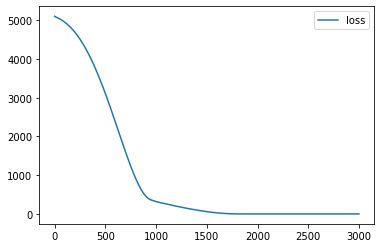

In [ ]:
loss_plot = pd.DataFrame(ai.history.history)
loss_plot.plot()

In [ ]:
ai.evaluate(x_test,y_test)

1/1 [==============================] - 0s 91ms/step - loss: 0.0084


0.008415469899773598

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

err = rmse()
preds = ai.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 67ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.0917341>

In [ ]:
err = rmse()
print("Root Mean Squred Error:",err(y_test,preds).numpy())

Root Mean Squred Error: 0.0917341


In [ ]:
x_n1 = [[30]]
x_n_n = scaler.transform(x_n1)
ai.predict(x_n_n)

1/1 [==============================] - 0s 20ms/step


array([[180.19289]], dtype=float32)